In [2]:
import pandas as pd

metrics = pd.read_parquet(
    "/home/martin/oar-deployments/2025-06-20-bench2/154640-batch1", engine="pyarrow"
)


In [3]:
xp_length = max(metrics.index)-min(metrics.index)
xp_length

3677

In [4]:
for c in metrics.columns:
    print(f"total {c}: " + str(metrics[c].sum()))
for c in metrics.columns:
    print(f"average per process {c}: " + str(metrics[c].sum() / 2000))

accessed = metrics["swhfuse_get_blob"].sum() - metrics["swhfuse_not_found"].sum()
print(f"Actually accessed files = {accessed}, ie. {accessed / xp_length}/s")

total swhfuse_waiting_graph: 74033710.15844801
total swhfuse_get_blob: 47985487.0
total swhfuse_waiting_storage: 1159819.611606
total swhfuse_not_found: 36082837.0
total swhfuse_waiting_objstorage: 10313844.484252
average per process swhfuse_waiting_graph: 37016.855079224006
average per process swhfuse_get_blob: 23992.7435
average per process swhfuse_waiting_storage: 579.909805803
average per process swhfuse_not_found: 18041.4185
average per process swhfuse_waiting_objstorage: 5156.922242126
Actually accessed files = 11902650.0, ie. 3237.0546641283654/s


In [5]:
metrics["swhfuse_not_found"].sum() / metrics["swhfuse_get_blob"].sum()


np.float64(0.7519531269944181)

<Axes: title={'center': 'swh-fuse cumulated waiting times over 2000 processes'}, xlabel='xp time (s)', ylabel='waiting time (s)'>

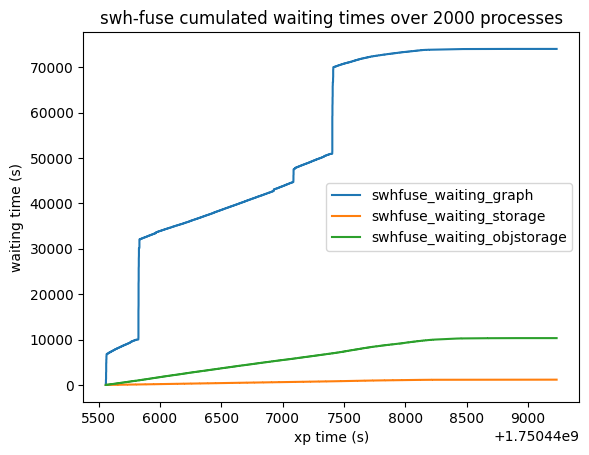

In [6]:
(
    metrics[
        [
            "swhfuse_waiting_graph",
            "swhfuse_waiting_storage",
            "swhfuse_waiting_objstorage",
        ]
    ]
    .sort_index()
    .fillna(0.0)
    .cumsum()
    / 1000
).plot(
    title="swh-fuse cumulated waiting times over 2000 processes",
    xlabel="xp time (s)",
    ylabel="waiting time (s)",
)


<Axes: title={'center': 'Number of object access/s'}>

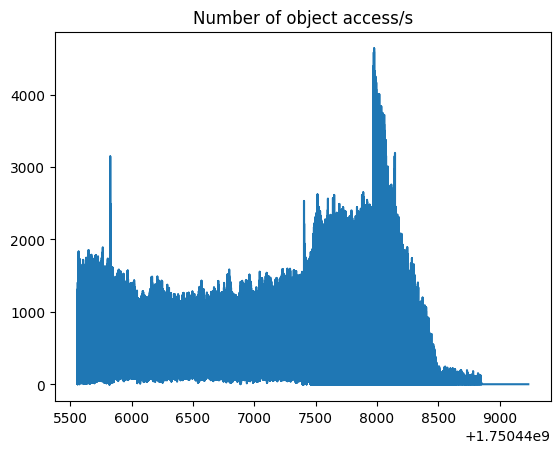

In [7]:
(metrics["swhfuse_get_blob"].sort_index().fillna(0.0) - metrics["swhfuse_not_found"].sort_index().fillna(0.0)).plot(title="Number of object access/s")
